# Chapter 8: Visual syntax

For additional context see chapter 8 of [The Virus of Variation & Process Behavior Charts: A Guide for the Perplexed](https://www.brokenquality.com/book).

In [1]:
# Import libraries
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

%matplotlib inline

## Get the data

In [3]:
# Establish the dataset_url
dataset_url = r'https://raw.githubusercontent.com/jimlehner/the-virus-of-variation-and-pbcs/refs/heads/main/data/01-vienna-general-yearly-births-deaths-ratio-by-clinic-data.csv'

# Get data function
def get_data(dataset_url) -> pd.DataFrame:
    return pd.read_csv(dataset_url)

# Get data
df = get_data(dataset_url)
df.head()

,Clinic,Employee,Year,Births,Deaths,Death-to-Birth Ratio,Note
0,1st Clinic,Students & Doctors,1833,3737,197,5.3,Second clinic started
1,1st Clinic,Students & Doctors,1834,2657,205,7.7,NaN
2,1st Clinic,Students & Doctors,1835,2573,143,5.6,NaN
3,1st Clinic,Students & Doctors,1836,2677,200,7.5,NaN
4,1st Clinic,Students & Doctors,1837,2765,251,9.1,NaN


In [4]:
# Make 'Year' column string

In [5]:
df['Year'] = df['Year'].astype('string')
df.dtypes

Clinic                   object
Employee                 object
Year                     string
Births                    int64
Deaths                    int64
Death-to-Birth Ratio    float64
Note                     object
dtype: object

## Fig 8.1: The aggregate of marginal gains

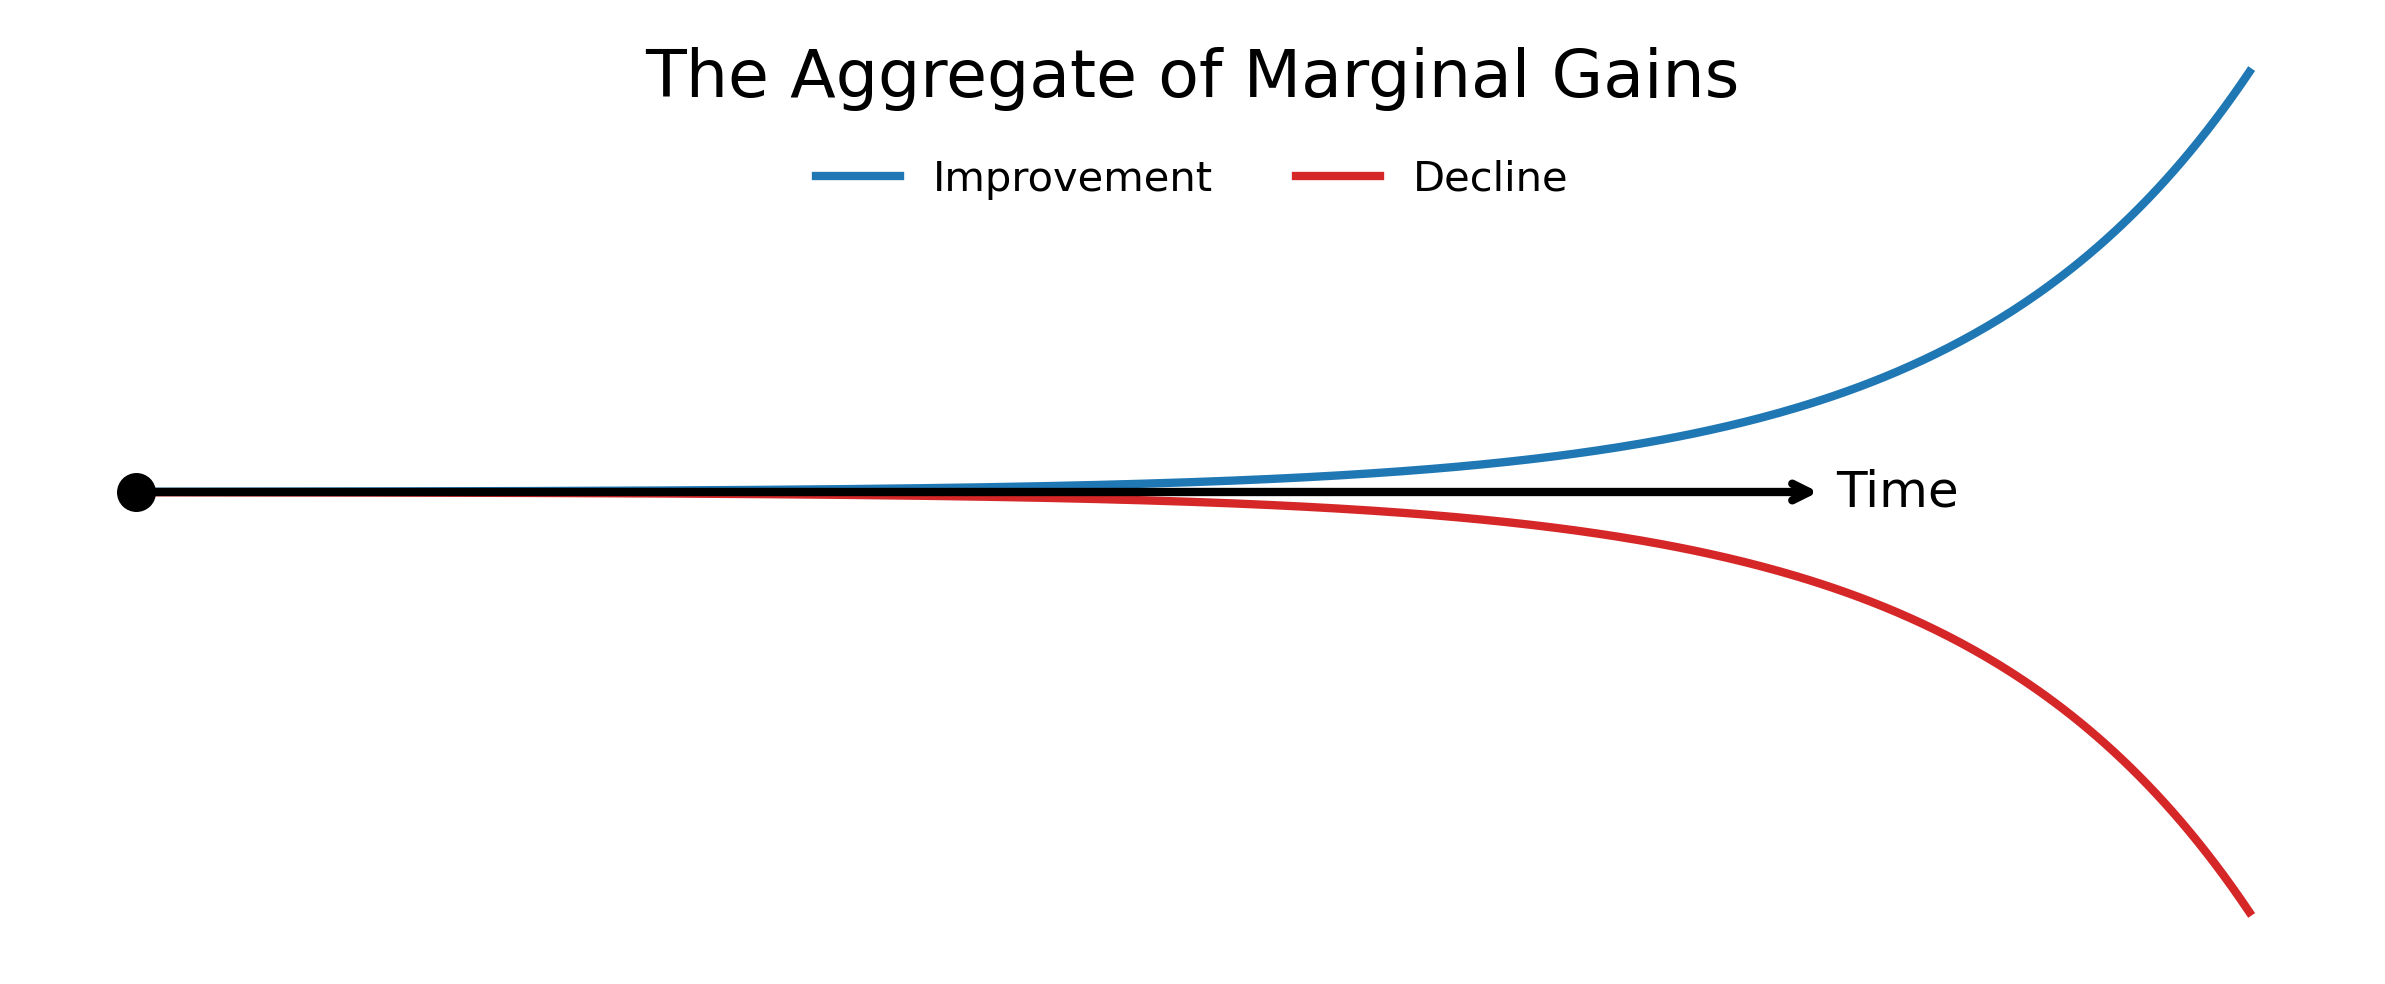

In [7]:
# Parameters for the exponential curve
a = 1  # Initial value
b = 0.5  # Growth rate

# Generate x values
x = np.linspace(0, 15, 500)  # 100 points from 0 to 10

# Generate y values for the exponential curve
y = a * np.exp(b * x)
negative_y = -y  # Negative version of the curve

# Create fig, ax
fig, ax = plt.subplots(figsize=(10,4), dpi=300)

# Plot the original exponential curve
plt.plot(x, y, label='Improvement', color="tab:blue", lw=2)

# Plot the negative exponential curve
plt.plot(x, negative_y, label='Decline', color="tab:red", lw=2)

# Add arrow from (0.0, y_at_0) to (0.5, y_at_0.5) on the original curve
start_x, end_x = 0.0, 12
start_y = 0  # y value at x = 0.0
end_y = 0      # y value at x = 0.5

# Add arrow annotation
plt.annotate(
    "",  # No text
    xy=(end_x, end_y),  # Arrowhead position
    xytext=(start_x, start_y),  # Starting position
    arrowprops=dict(arrowstyle="->", color="black", lw=2)
)

# Add 'Time' annotation
plt.annotate(
    'Time',
    xy=(0,0),
    xytext=(12.5,0),
    ha='center',
    va='center',
    fontsize=12
)

# Add circle at 0,0
sns.scatterplot(x=[0],
               y=[0],
               s=75,
               c='black',
                edgecolor='black',
               zorder=12
               )

# Add titles, labels, and legend
plt.title("The Aggregate of Marginal Gains",
          y=0.9, 
          fontsize=16)

# Formating
plt.xlabel("")
plt.ylabel("")
plt.legend(
    loc="upper center",
    bbox_to_anchor=(0.5,0.9),
    ncol=2,
    frameon=False
)

# Despine
sns.despine(left=True, bottom=True)

# Set tick parameters
plt.tick_params(left=False, bottom=False, 
                labelleft=False, labelbottom=False)

# Show plot
plt.show()

## Fig 8.2: Initial bar chart of death-to-birth ratios

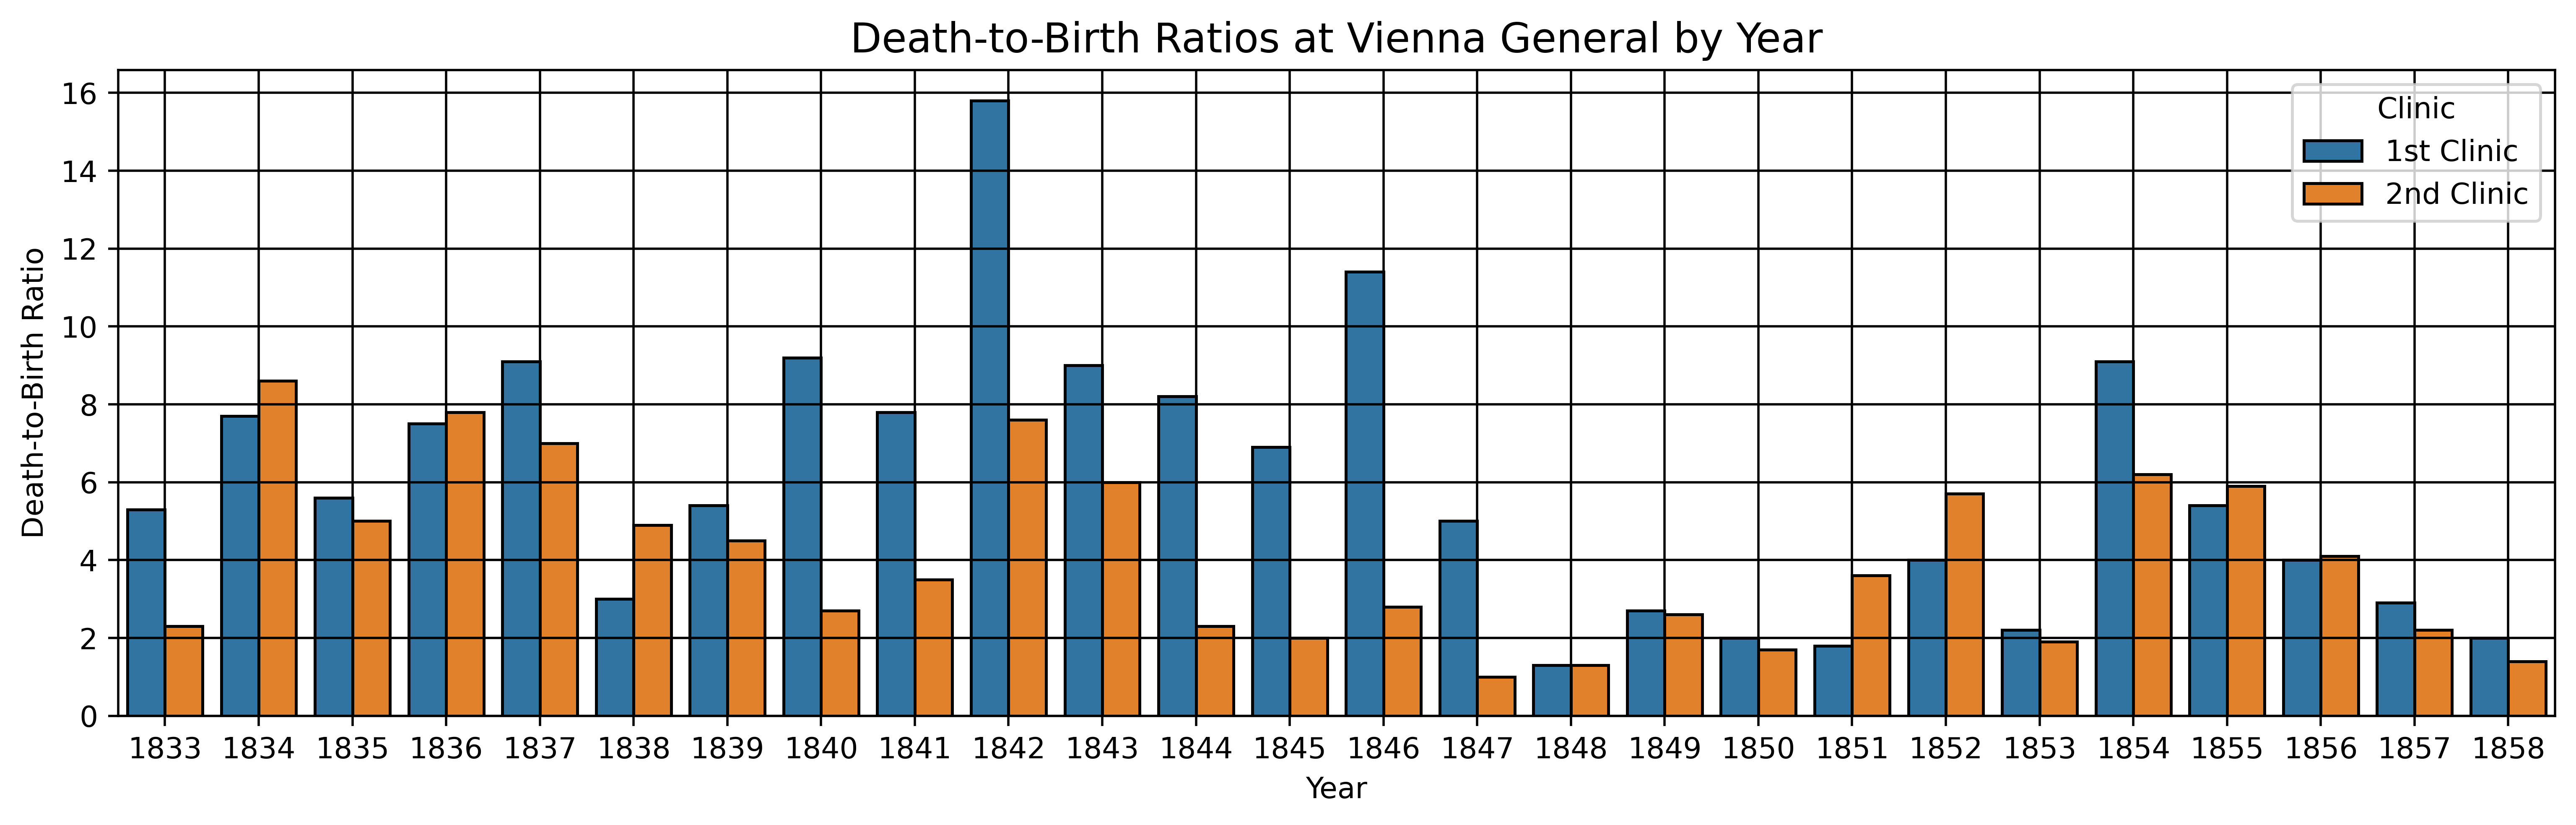

In [19]:
# Bar chart of death-to-birth ratios at Vienna General
fig, ax = plt.subplots(figsize=(15,4), dpi=500)

# Plot data in bar chart
sns.barplot(data=df, 
            x='Year', 
            y='Death-to-Birth Ratio', 
            hue='Clinic', 
            edgecolor='black')

# Specify grid color
ax.grid(c='black')

# Add title
plt.title('Death-to-Birth Ratios at Vienna General by Year', fontsize=14)

# Show plot
plt.show()

## Fig 8.3: Improved bar chart of death-to-birth ratios

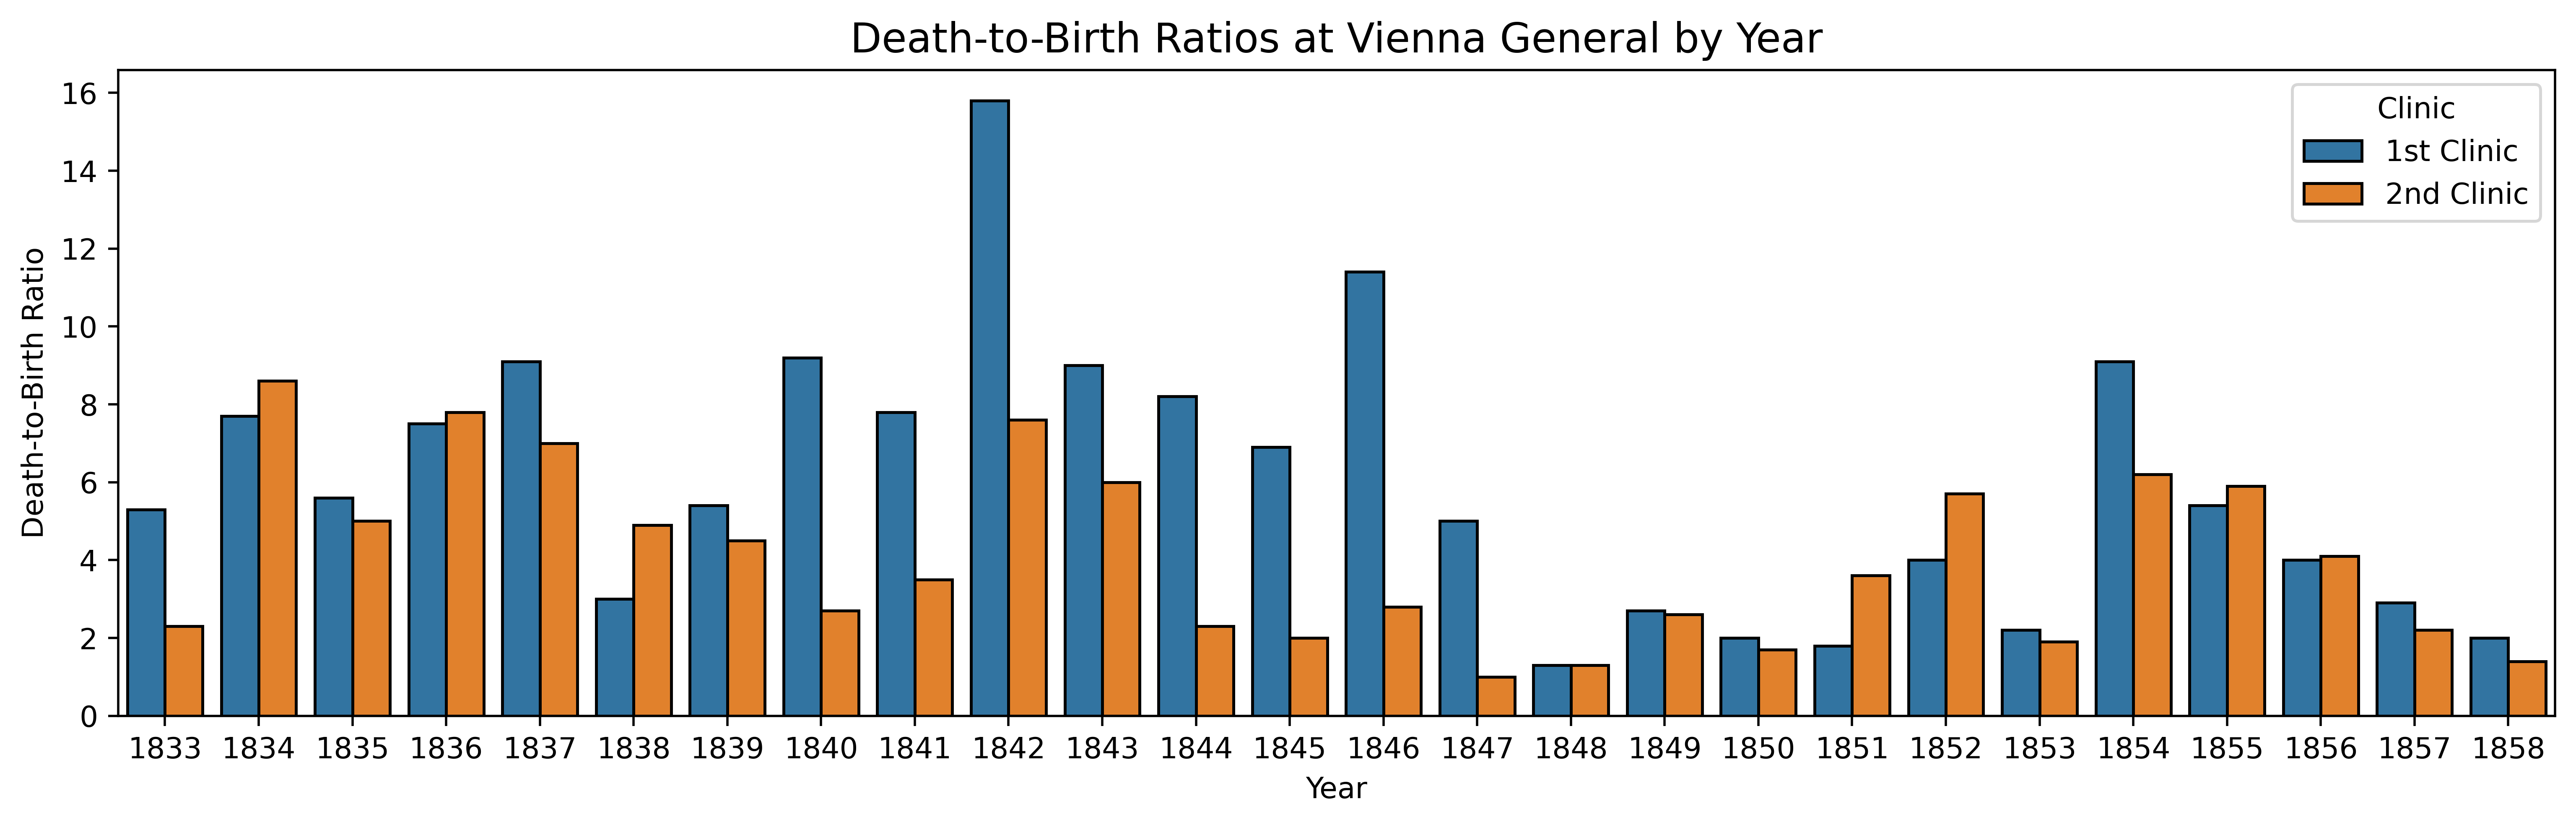

In [20]:
# Bar chart of death-to-birth ratios at Vienna General with no grid
fig, ax = plt.subplots(figsize=(15,4), dpi=500)

# Plot data in bar chart
sns.barplot(data=df, 
            x='Year', 
            y='Death-to-Birth Ratio', 
            hue='Clinic', 
            edgecolor='black')

# Add title
plt.title('Death-to-Birth Ratios at Vienna General by Year', fontsize=14)

# Show plot
plt.show()

## Fig 8.4: Time series of death-to-birth ratios

In [12]:
# Split original into two dataframes according to clinic
first_clinic = df[df['Clinic'] == '1st Clinic']
second_clinic = df[df['Clinic'] == '2nd Clinic'].reset_index(drop=True)

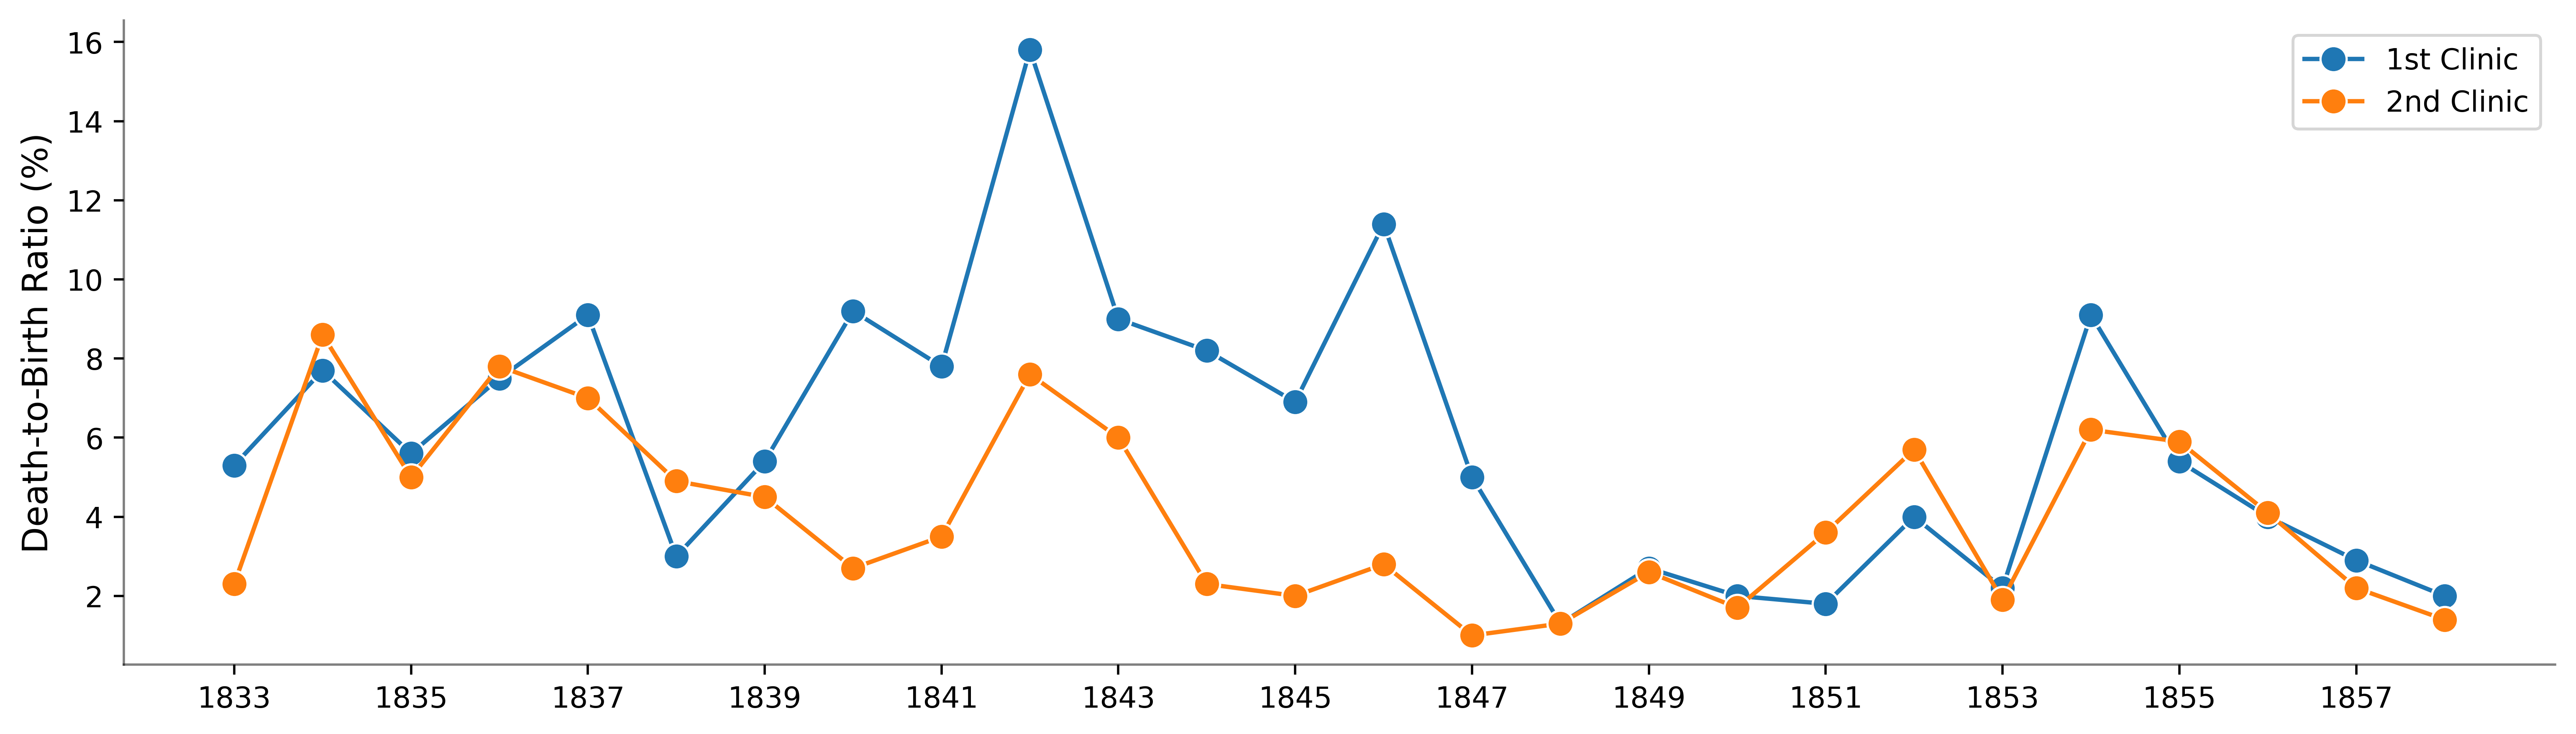

In [21]:
# Time series of death-to-birth ratios at Vienna General
fig, ax = plt.subplots(figsize=(15,4), dpi=500)

# Plot first clinic data
sns.lineplot(data=first_clinic, 
             x='Year', 
             y='Death-to-Birth Ratio',
             marker='o', 
             markersize=9, 
             label='1st Clinic')

# Plot second clinic data
sns.lineplot(data=second_clinic, x='Year', y='Death-to-Birth Ratio',
            marker='o', markersize=9, label='2nd Clinic')

# Despine
sns.despine()
# Set spine alpha values
ax.spines[['left','bottom']].set_alpha(0.5)

# Additional formatting
ax.set_xlabel('')
plt.xticks(ticks=np.arange(0, 26, 2))
ax.set_ylabel('Death-to-Birth Ratio (%)', fontsize=12)

# Show plot
plt.show()

## Fig 8.5: Bar chart and time series comparison of death-to-birth ratios

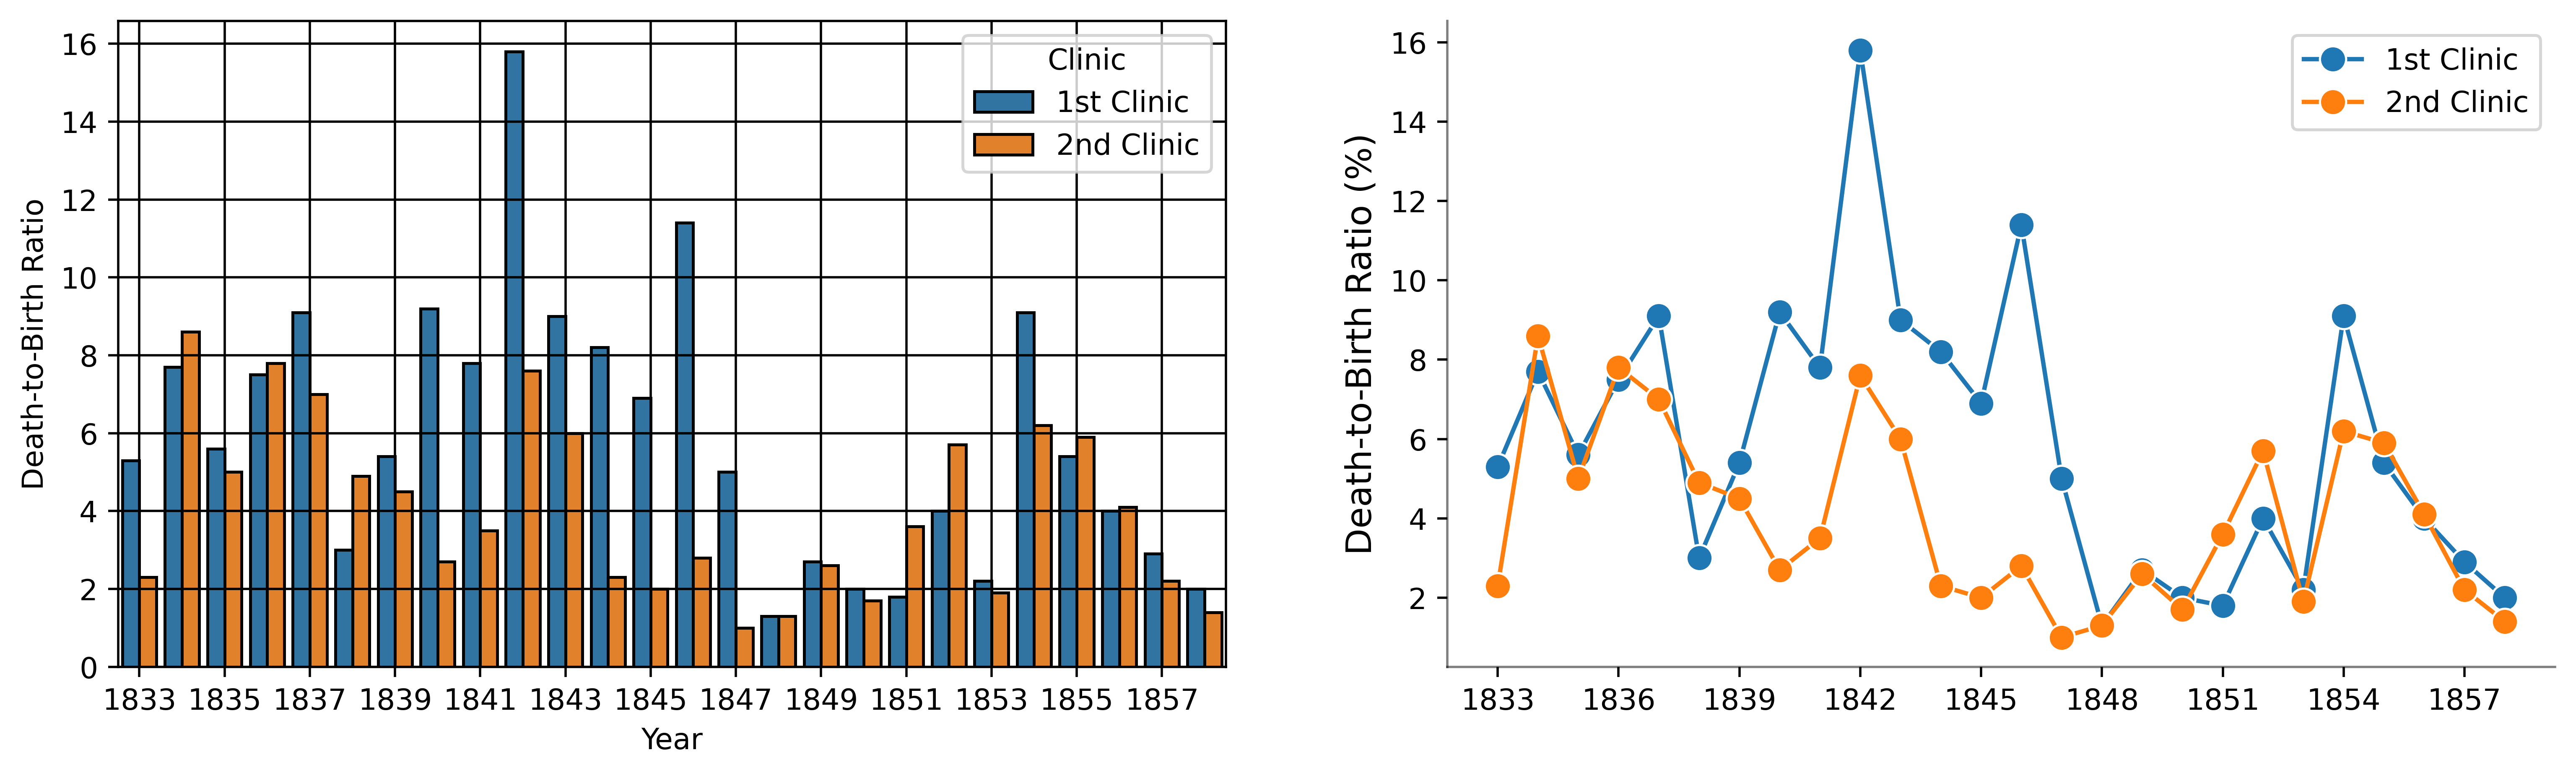

In [22]:
# Time series of death-to-birth ratios at Vienna General
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,4), dpi=500)

# Plot data in a bar chart
sns.barplot(data=df, x='Year', y='Death-to-Birth Ratio', 
            hue='Clinic', edgecolor='black', ax=ax[0])

# Specify grid color
ax[0].grid(c='black')

# Plot first clinic data as a time series
sns.lineplot(data=first_clinic, 
             x='Year', 
             y='Death-to-Birth Ratio',
             marker='o', 
             markersize=9, 
             label='1st Clinic', 
             ax=ax[1])

# Plot second clinic data in a time series
sns.lineplot(data=second_clinic, 
             x='Year', 
             y='Death-to-Birth Ratio',
             marker='o', 
             markersize=9, 
             label='2nd Clinic', 
             ax=ax[1])

# Despine time series
sns.despine(ax=ax[1])
# Specify spine alphas
ax[1].spines[['left','bottom']].set_alpha(0.5)
ax[1].set_xlabel('')

# plt.title('Death-to-Birth Ratios at Vienna General by Year', fontsize=14)
plt.xticks(ticks=np.arange(0, 26, 3))
ax[1].set_ylabel('Death-to-Birth Ratio (%)', fontsize=12)

# Apply the tick configuration to the first subplot
ax[0].set_xticks(np.arange(0, 26, 2))

# Show plot
plt.show()